In [88]:
import pandas as pd
pd.options.display.max_columns=999
import numpy as np
import matplotlib 
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as stats
from scipy.stats import skew, norm 
import warnings 
warnings.filterwarnings('ignore')

In [8]:
hour=pd.read_csv("hour.csv")
day=df=pd.read_csv("day.csv")

In [10]:
df=hour.copy()

In [11]:
df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [12]:
df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [16]:
df.apply(lambda x:len(x.unique()))

instant       17379
dteday          731
season            4
yr                2
mnth             12
hr               24
holiday           2
weekday           7
workingday        2
weathersit        4
temp             50
atemp            65
hum              89
windspeed        30
casual          322
registered      776
cnt             869
dtype: int64

In [18]:
df.rename(columns={'yr':'year',
                  'weathersit':'weather',
                  'cnt':'c',
                  'hum':'humidity',
                  'hr':'hour',
                  'mnth':'month'},inplace=True)

In [19]:
df.head()

,instant,dteday,season,year,month,hour,holiday,weekday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,c
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [22]:
df.drop(['dteday','instant','year'],axis=1,inplace=True)

In [24]:
df.drop(['atemp'],axis=1,inplace=True)

In [25]:
df.head()

,season,month,hour,holiday,weekday,workingday,weather,temp,humidity,windspeed,casual,registered,c
0,1,1,0,0,6,0,1,0.24,0.81,0.0,3,13,16
1,1,1,1,0,6,0,1,0.22,0.80,0.0,8,32,40
2,1,1,2,0,6,0,1,0.22,0.80,0.0,5,27,32
3,1,1,3,0,6,0,1,0.24,0.75,0.0,3,10,13
4,1,1,4,0,6,0,1,0.24,0.75,0.0,0,1,1


In [ ]:
df.rename(columns=[])

<AxesSubplot:xlabel='hour', ylabel='c'>

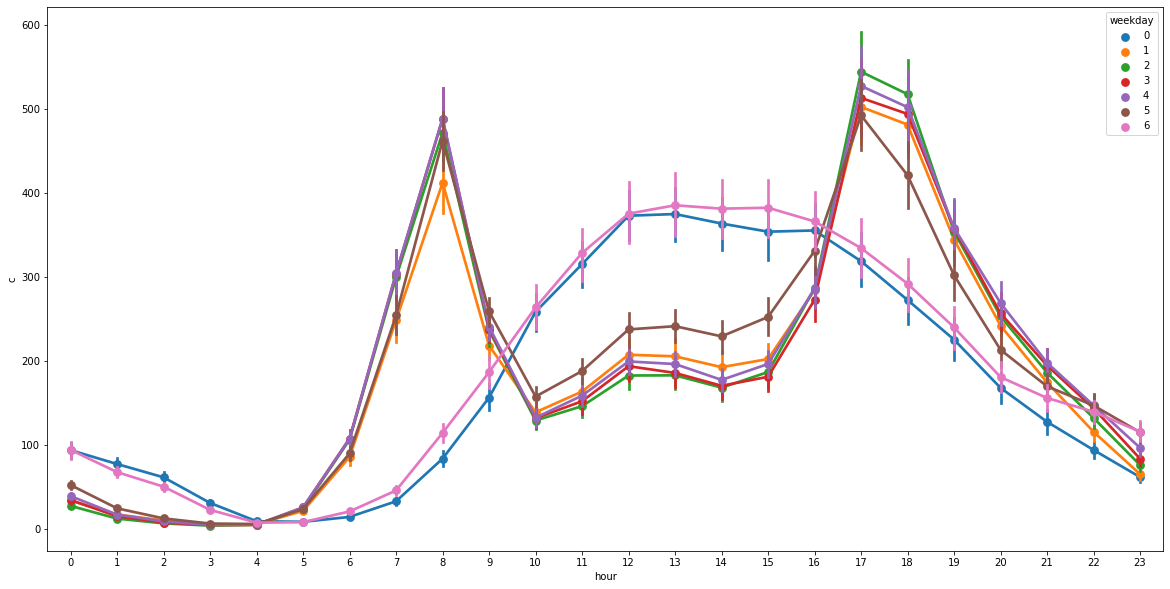

In [36]:
fig,ax=plt.subplots(figsize=(20,10))
sns.pointplot(data=df,x='hour',y='c',hue='weekday',ax=ax)

<AxesSubplot:xlabel='hour', ylabel='casual'>

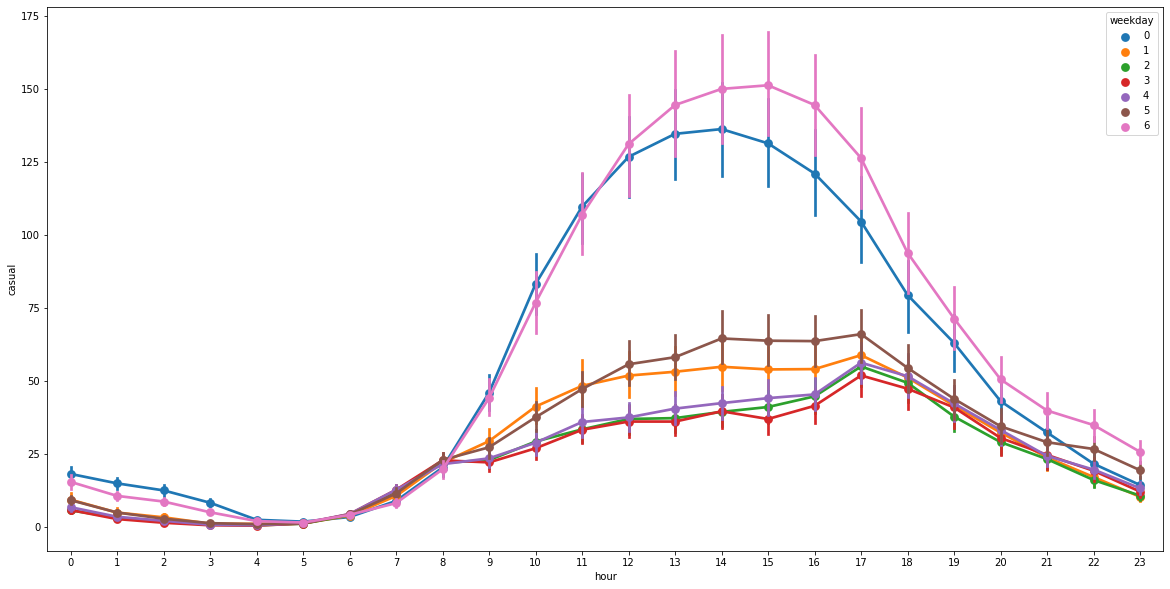

In [38]:
fig,ax=plt.subplots(figsize=(20,10))
sns.pointplot(data=df,x='hour',y='casual',hue='weekday',ax=ax)

<AxesSubplot:xlabel='hour', ylabel='registered'>

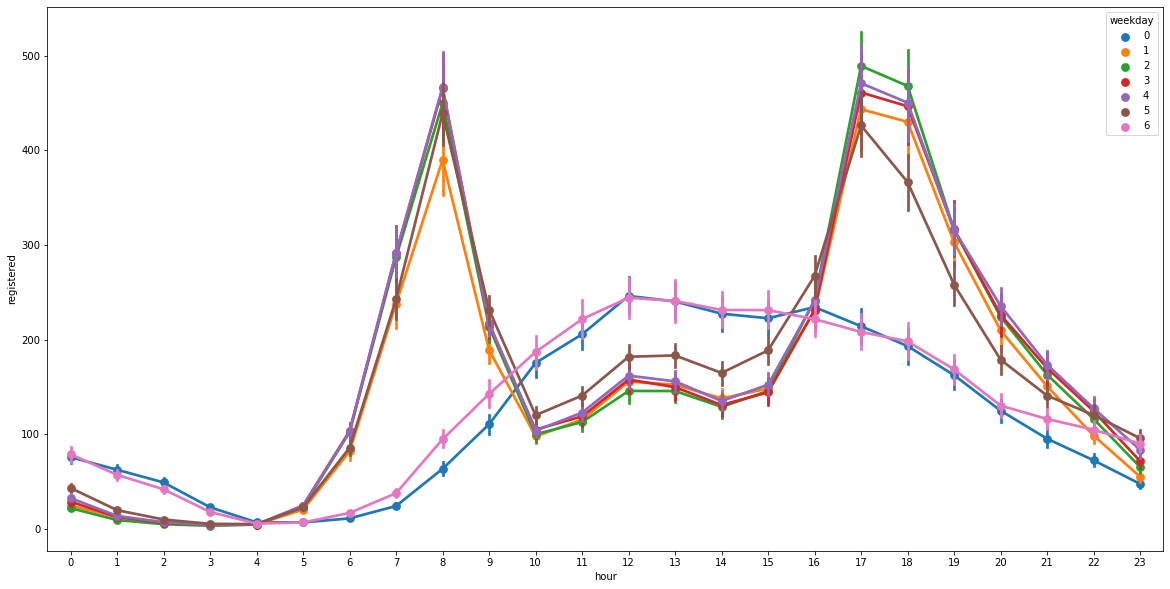

In [39]:
fig,ax=plt.subplots(figsize=(20,10))
sns.pointplot(data=df,x='hour',y='registered',hue='weekday',ax=ax)

<AxesSubplot:xlabel='hour', ylabel='c'>

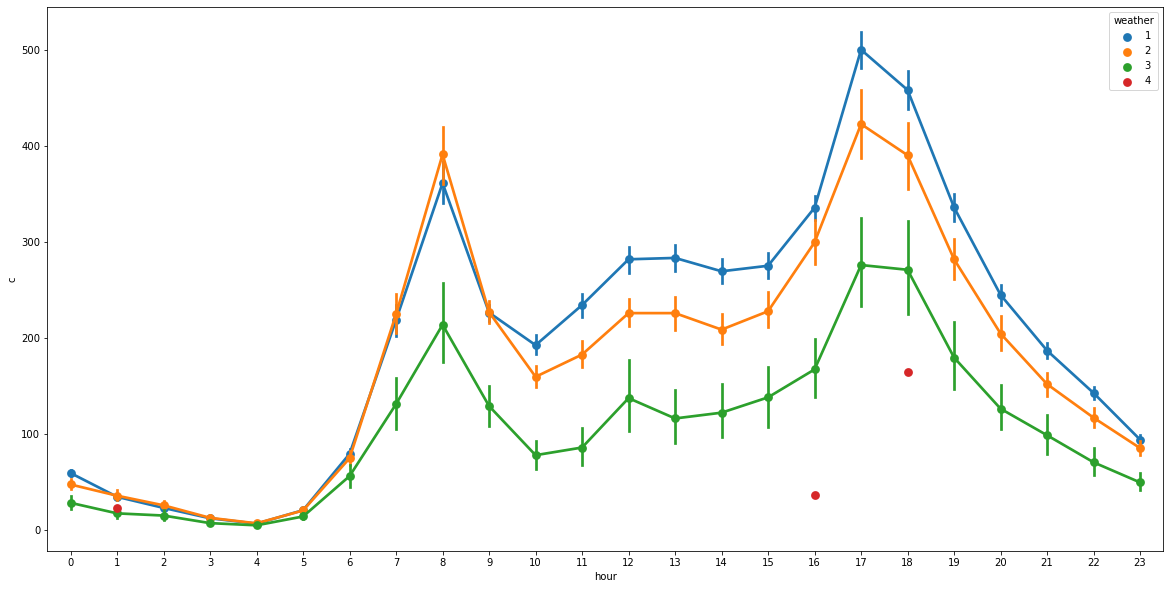

In [40]:
fig,ax=plt.subplots(figsize=(20,10))
sns.pointplot(data=df,x='hour',y='c',hue='weather',ax=ax)

<AxesSubplot:xlabel='hour', ylabel='c'>

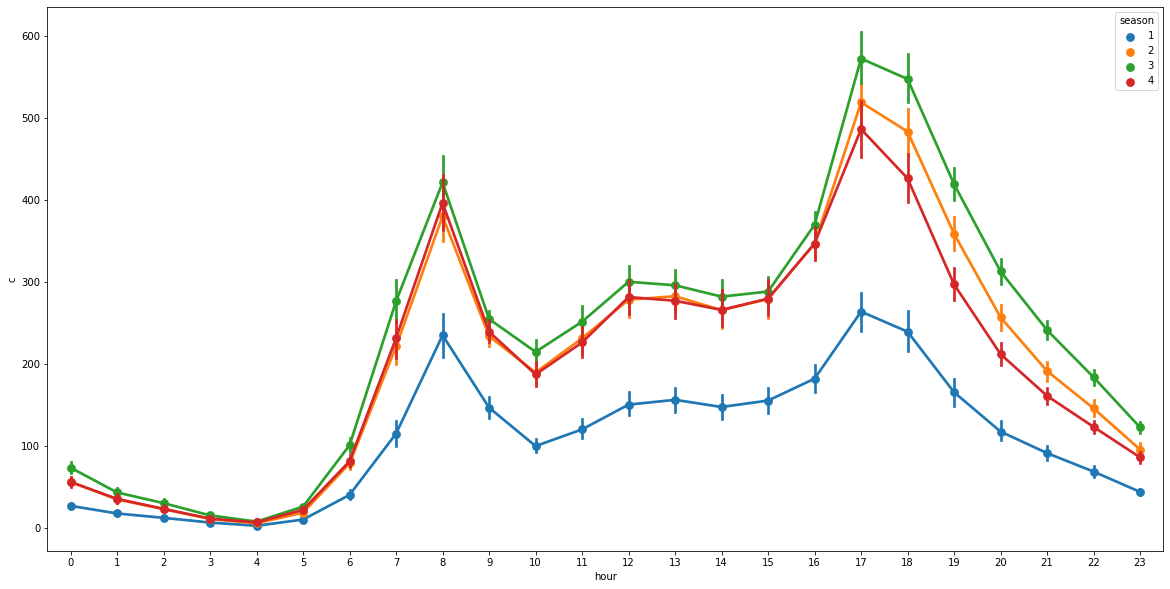

In [41]:
fig,ax=plt.subplots(figsize=(20,10))
sns.pointplot(data=df,x='hour',y='c',hue='season',ax=ax)

<AxesSubplot:xlabel='hour', ylabel='c'>

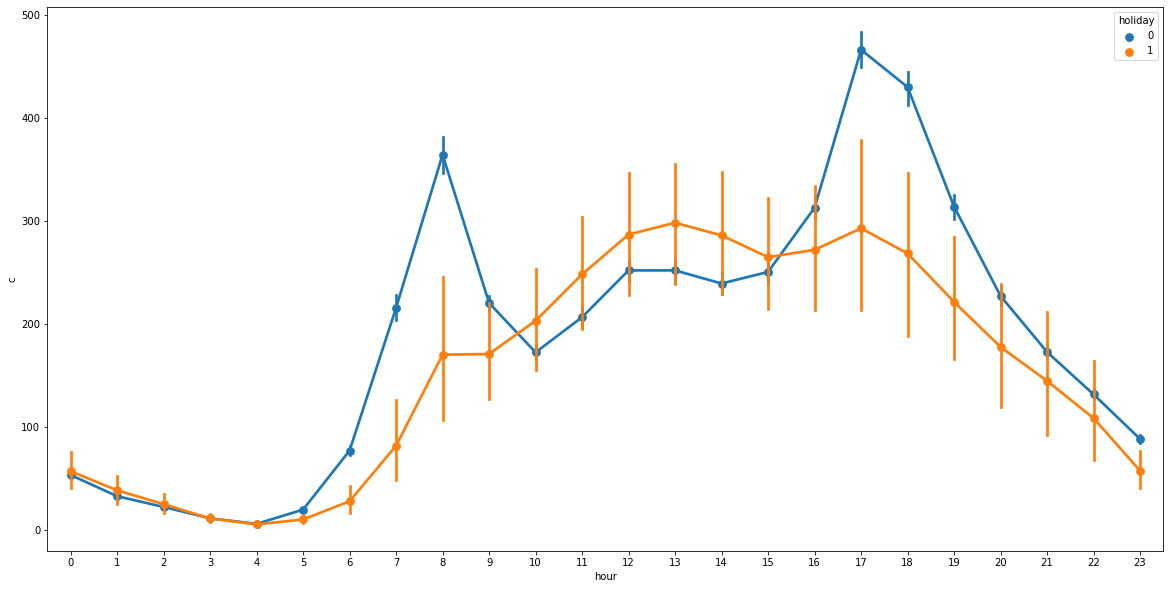

In [42]:
fig,ax=plt.subplots(figsize=(20,10))
sns.pointplot(data=df,x='hour',y='c',hue='holiday',ax=ax)

<AxesSubplot:xlabel='weekday', ylabel='c'>

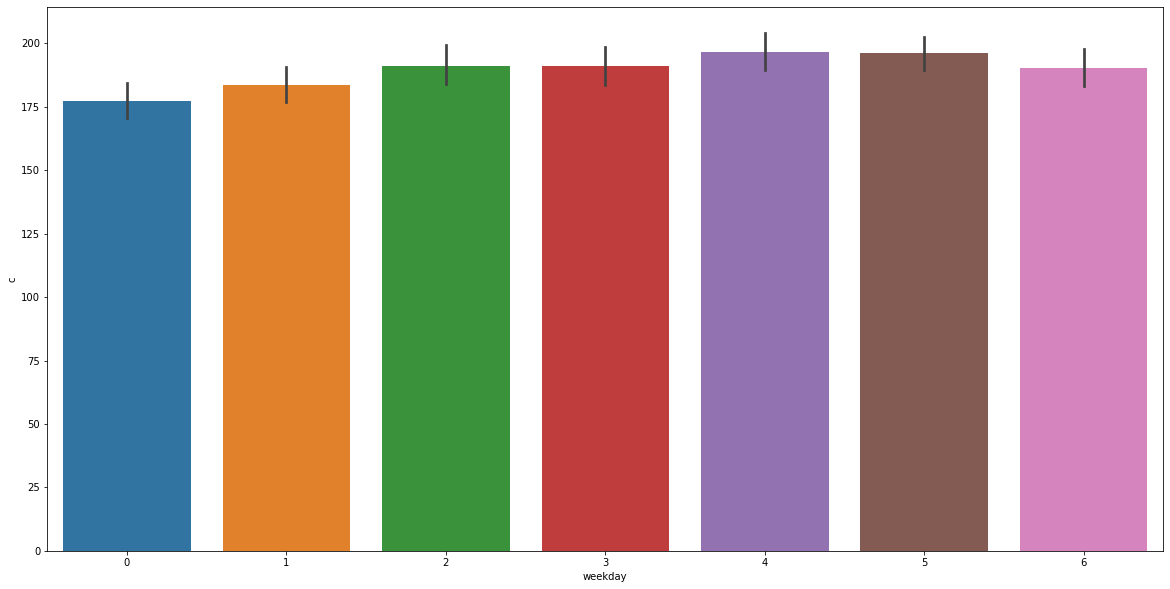

In [47]:
fig,ax=plt.subplots(figsize=(20,10))
sns.barplot(data=df,x='weekday',y='c',ax=ax)

<AxesSubplot:xlabel='month', ylabel='c'>

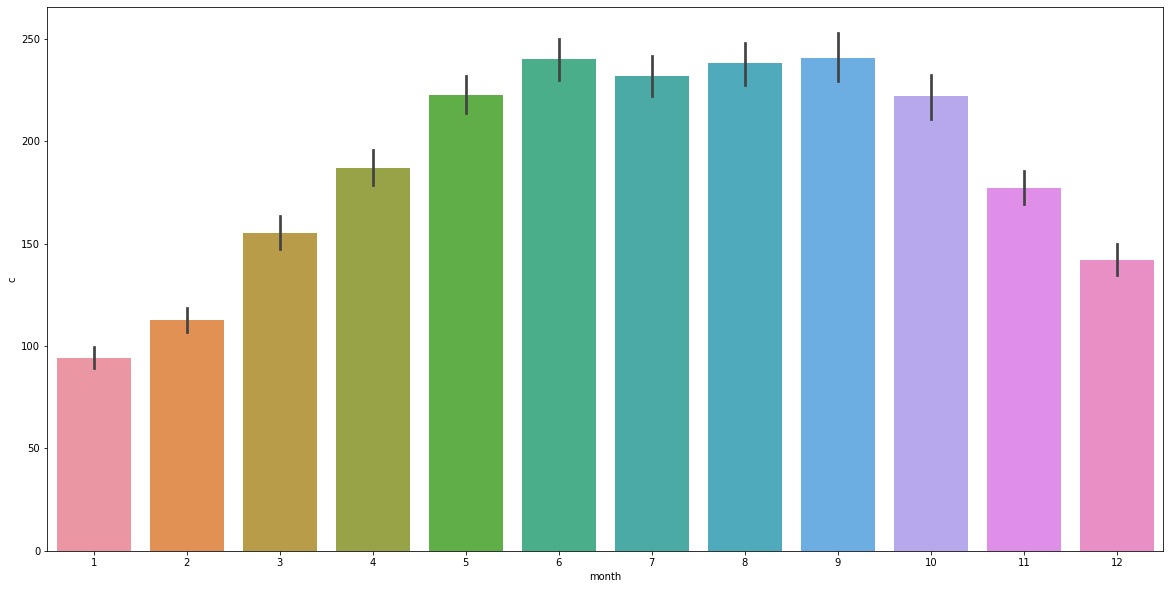

In [52]:
fg,ax=plt.subplots(figsize=(20,10))
sns.barplot(data=df,x='month',y='c',ax=ax)

<AxesSubplot:xlabel='weather', ylabel='c'>

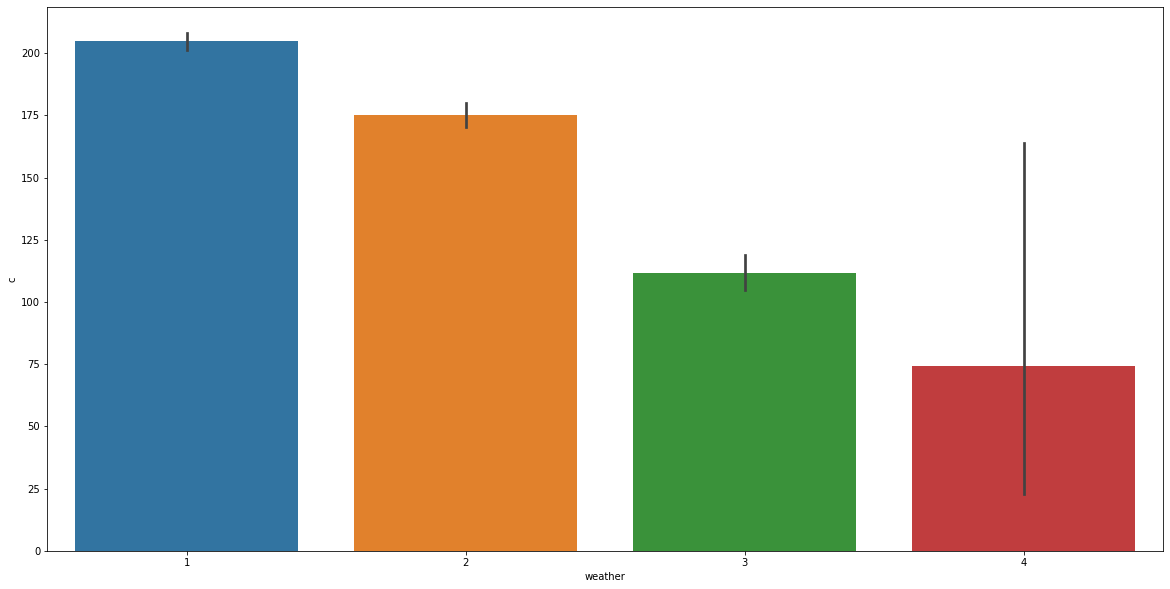

In [53]:
fg,ax=plt.subplots(figsize=(20,10))
sns.barplot(data=df,x='weather',y='c',ax=ax)

In [50]:
df.columns

Index(['season', 'month', 'hour', 'holiday', 'weekday', 'workingday',
       'weather', 'temp', 'humidity', 'windspeed', 'casual', 'registered',
       'c'],
      dtype='object')

In [63]:
df.apply(lambda x:len(x.unique()))

season          4
month          12
hour           24
holiday         2
weekday         7
workingday      2
weather         4
temp           50
humidity       89
windspeed      30
casual        322
registered    776
c             869
dtype: int64

In [68]:
col=['season','month','holiday','weekday','workingday','weather']
for i in col:
    df[i]=df[i].astype('category')

In [69]:
df.dtypes

season        category
month         category
hour             int64
holiday       category
weekday       category
workingday    category
weather       category
temp           float64
humidity       float64
windspeed      float64
casual           int64
registered       int64
c                int64
dtype: object

<AxesSubplot:>

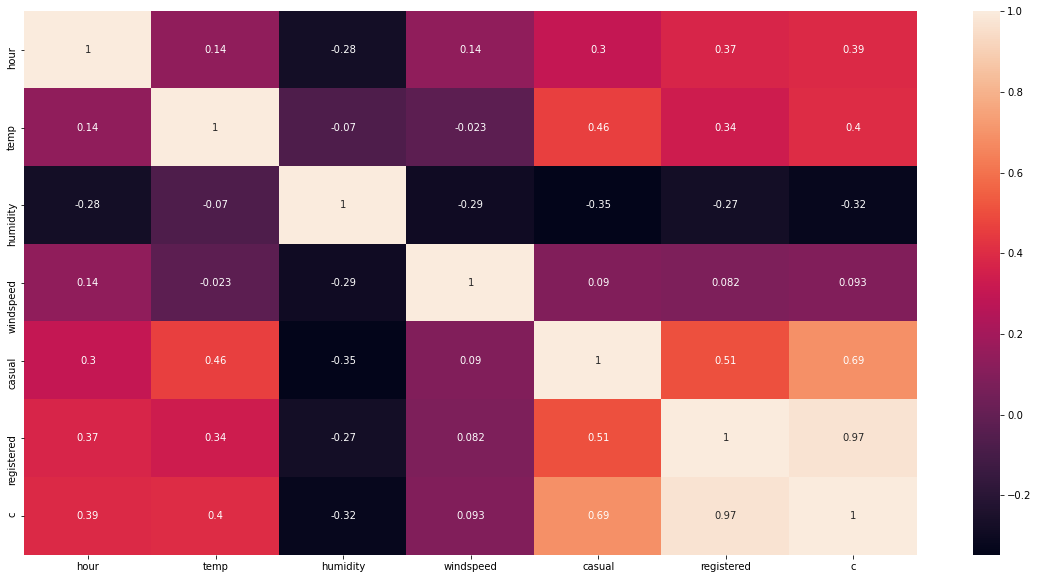

In [78]:
plt.subplots(figsize=(20,10))
corr=df.corr()
sns.heatmap(corr,annot=True)

[Text(0.5, 1.0, 'Relation between humidity and users')]

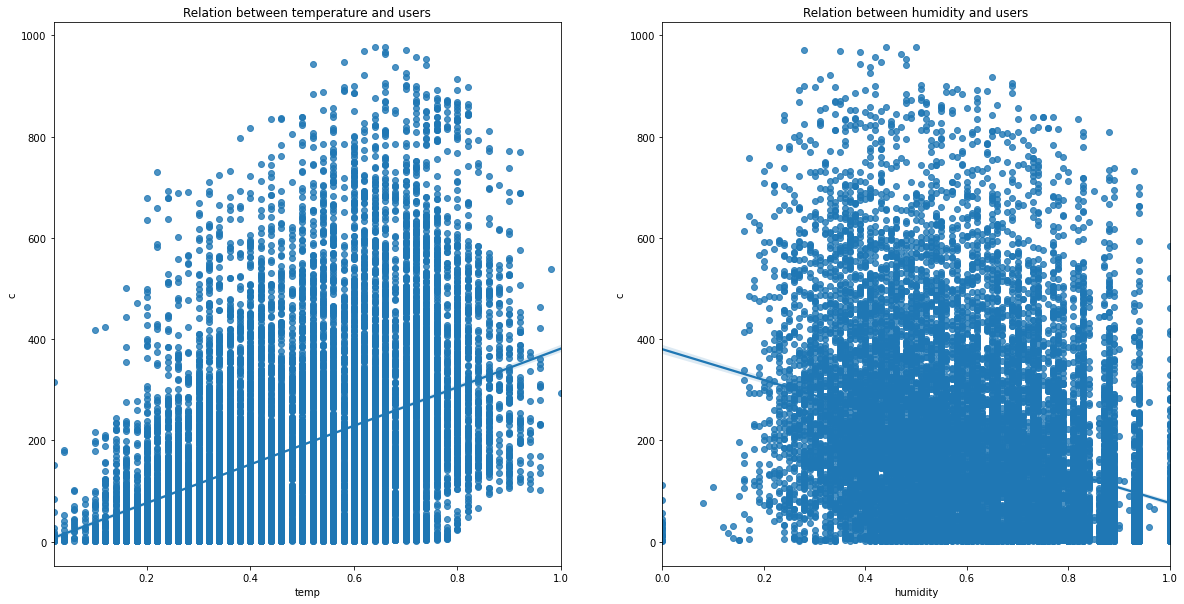

In [84]:
fg,(ax1,ax2)=plt.subplots(ncols=2,figsize=(20,10))
sns.regplot(x=df['temp'],y=df['c'], ax=ax1)
ax1.set(title="Relation between temperature and users")
sns.regplot(x=df['humidity'], y=df['c'], ax=ax2)
ax2.set(title="Relation between humidity and users")

[Text(0.5, 1.0, 'Theoritical quantiles')]

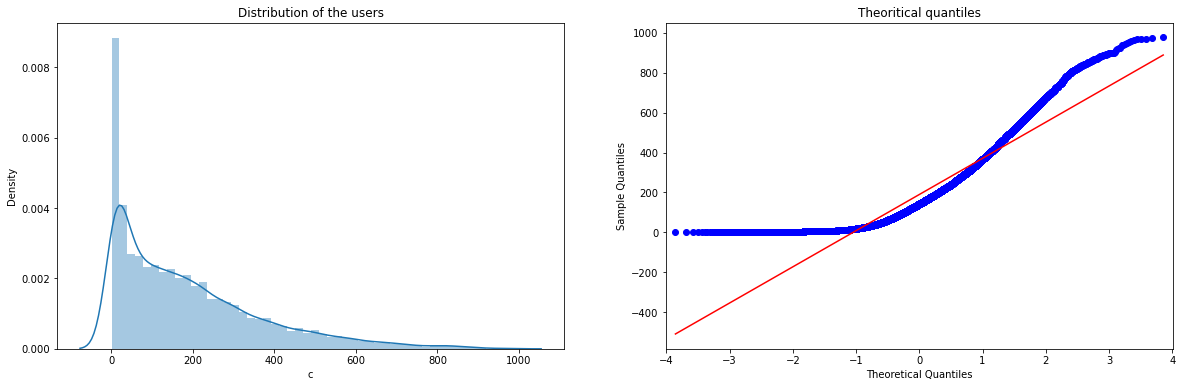

In [86]:
from statsmodels.graphics.gofplots import qqplot
fig, (ax1,ax2) = plt.subplots(ncols=2, figsize=(20,6))
sns.distplot(df['c'], ax=ax1)
ax1.set(title='Distribution of the users')
qqplot(df['c'], ax=ax2, line='s')
ax2.set(title='Theoritical quantiles')


In [96]:
df['c'] = np.log(df['c'])

[Text(0.5, 1.0, 'Theoritical quantiles')]

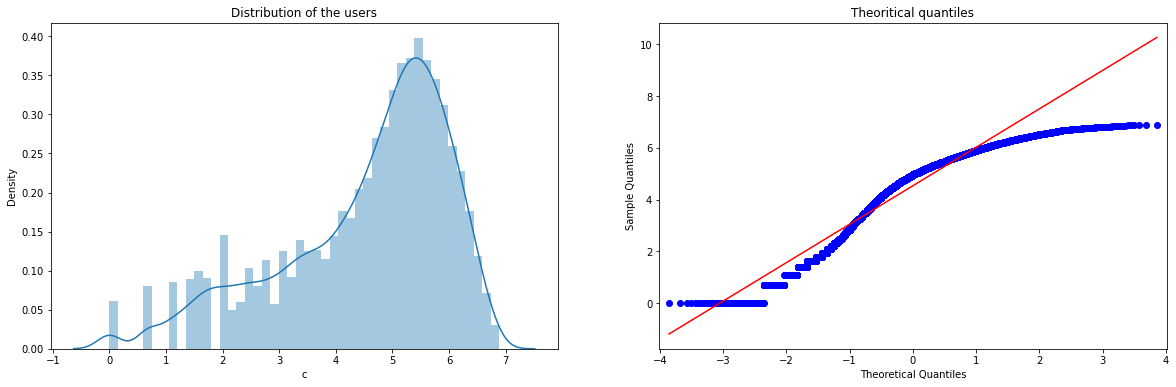

In [97]:
from statsmodels.graphics.gofplots import qqplot
fig, (ax1,ax2) = plt.subplots(ncols=2, figsize=(20,6))
sns.distplot(df['c'], ax=ax1)
ax1.set(title='Distribution of the users')
qqplot(df['c'], ax=ax2, line='s')
ax2.set(title='Theoritical quantiles')


In [98]:
pd.get_dummies(df['season'], prefix='season', drop_first=True)

,season_2,season_3,season_4
0,0,0,0
1,0,0,0
2,0,0,0
3,0,0,0
4,0,0,0
...,...,...,...
17374,0,0,0
17375,0,0,0
17376,0,0,0
17377,0,0,0


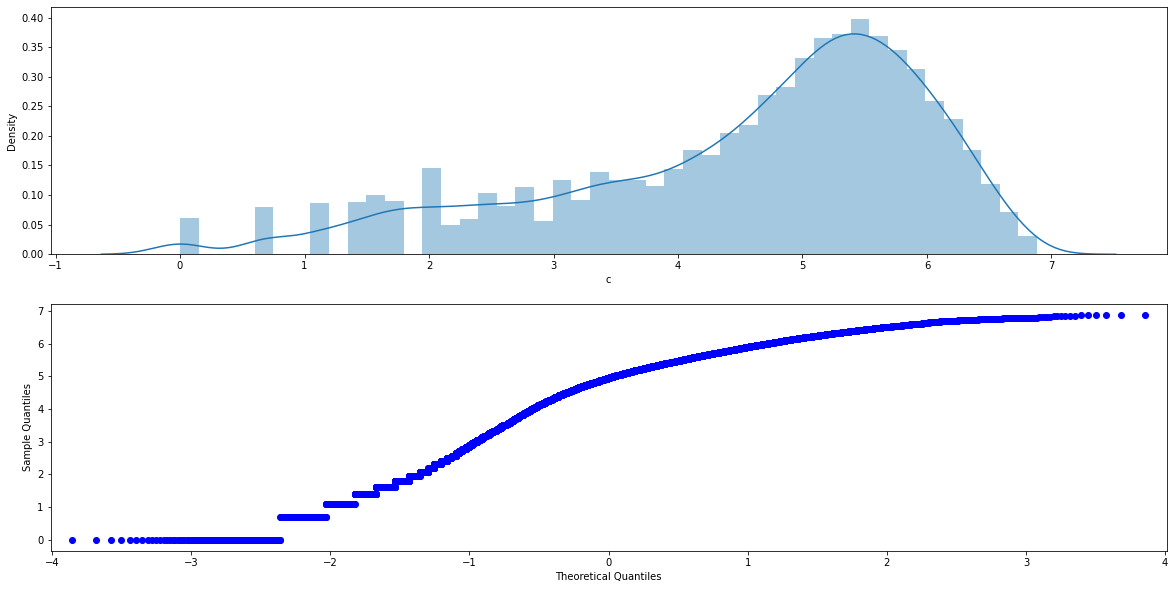

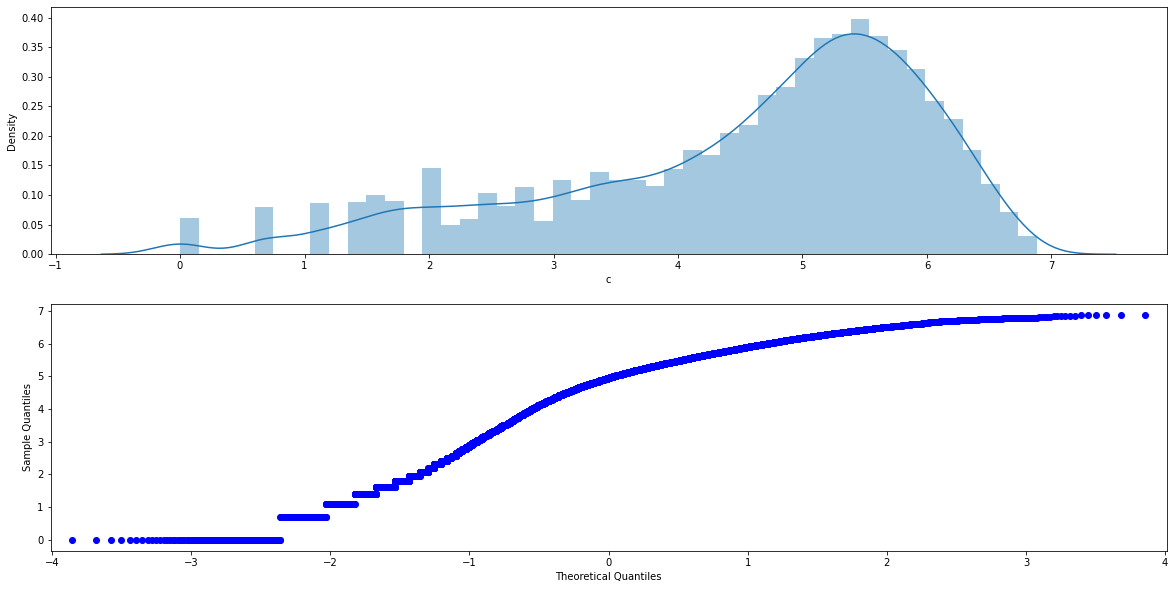

In [107]:
fig,(ax1,ax2)=plt.subplots(nrows=2,figsize=(20,10))
sns.distplot(df['c'],ax=ax1)
qqplot(df['c'],ax=ax2)